In [2537]:
import pandas as pd
import joblib
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression,LogisticRegression,LassoCV, RidgeCV
from sklearn.feature_selection import RFE, VarianceThreshold, SelectFromModel
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer, PowerTransformer, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt



In [2538]:
#Reading in the data frame
df = pd.read_csv(r"C:\Users\kajoo\Desktop\AI Course\SA_Aqar.csv", encoding="utf-8")

In [2539]:

df.head()


,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,0,1,0,0,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,0,0,0,0,0,0,1,0,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,1,1,0,0,1,0,1,0,0,1,0,0,60000,فيلا للايجار درج داخلي مشب خارجي مجلس مقلط وصا...
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,1,1,0,0,0,0,1,0,0,0,0,0,55000,فيلا للايجار جديده لن تستخدم ش...
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,1,1,0,0,1,0,1,0,1,1,0,0,70000,فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...


In [2540]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3718 entries, 0 to 3717
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          3718 non-null   object
 1   district      3718 non-null   object
 2   front         3718 non-null   object
 3   size          3718 non-null   int64 
 4   property_age  3718 non-null   int64 
 5   bedrooms      3718 non-null   int64 
 6   bathrooms     3718 non-null   int64 
 7   livingrooms   3718 non-null   int64 
 8   kitchen       3718 non-null   int64 
 9   garage        3718 non-null   int64 
 10  driver_room   3718 non-null   int64 
 11  maid_room     3718 non-null   int64 
 12  furnished     3718 non-null   int64 
 13  ac            3718 non-null   int64 
 14  roof          3718 non-null   int64 
 15  pool          3718 non-null   int64 
 16  frontyard     3718 non-null   int64 
 17  basement      3718 non-null   int64 
 18  duplex        3718 non-null   int64 
 19  stairs

In [2541]:
df.city.value_counts()

city
الخبر     976
الرياض    960
الدمام    894
جدة       888
Name: count, dtype: int64

In [2542]:
df.isnull().value_counts()

city   district  front  size   property_age  bedrooms  bathrooms  livingrooms  kitchen  garage  driver_room  maid_room  furnished  ac     roof   pool   frontyard  basement  duplex  stairs  elevator  fireplace  price  details
False  False     False  False  False         False     False      False        False    False   False        False      False      False  False  False  False      False     False   False   False     False      False  False      3638
                                                                                                                                                                                                                         True         80
Name: count, dtype: int64

In [2543]:
df.duplicated().value_counts()

True     2197
False    1521
Name: count, dtype: int64

In [2544]:
df.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Index: 1521 entries, 0 to 2824
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          1521 non-null   object
 1   district      1521 non-null   object
 2   front         1521 non-null   object
 3   size          1521 non-null   int64 
 4   property_age  1521 non-null   int64 
 5   bedrooms      1521 non-null   int64 
 6   bathrooms     1521 non-null   int64 
 7   livingrooms   1521 non-null   int64 
 8   kitchen       1521 non-null   int64 
 9   garage        1521 non-null   int64 
 10  driver_room   1521 non-null   int64 
 11  maid_room     1521 non-null   int64 
 12  furnished     1521 non-null   int64 
 13  ac            1521 non-null   int64 
 14  roof          1521 non-null   int64 
 15  pool          1521 non-null   int64 
 16  frontyard     1521 non-null   int64 
 17  basement      1521 non-null   int64 
 18  duplex        1521 non-null   int64 
 19  stairs     

In [2545]:
df2 = df.drop(columns=["details","front"], axis =1)
df2.columns

Index(['city', 'district', 'size', 'property_age', 'bedrooms', 'bathrooms',
       'livingrooms', 'kitchen', 'garage', 'driver_room', 'maid_room',
       'furnished', 'ac', 'roof', 'pool', 'frontyard', 'basement', 'duplex',
       'stairs', 'elevator', 'fireplace', 'price'],
      dtype='object')

In [2546]:
pd.set_option('display.float_format', lambda x: '%.5f' % x) 

In [2547]:
df2["price_log"]  = np.log(df2["price"])


In [2548]:
df2["price_log"].skew()

-0.6292765196135554

<Axes: >

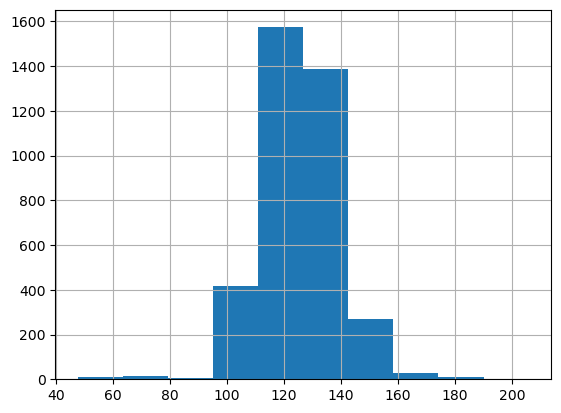

In [2549]:
a=df2["price_log"]**2
a.hist()

In [2550]:
a.skew()

-0.01088214476755073

In [2551]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3718 entries, 0 to 3717
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          3718 non-null   object 
 1   district      3718 non-null   object 
 2   size          3718 non-null   int64  
 3   property_age  3718 non-null   int64  
 4   bedrooms      3718 non-null   int64  
 5   bathrooms     3718 non-null   int64  
 6   livingrooms   3718 non-null   int64  
 7   kitchen       3718 non-null   int64  
 8   garage        3718 non-null   int64  
 9   driver_room   3718 non-null   int64  
 10  maid_room     3718 non-null   int64  
 11  furnished     3718 non-null   int64  
 12  ac            3718 non-null   int64  
 13  roof          3718 non-null   int64  
 14  pool          3718 non-null   int64  
 15  frontyard     3718 non-null   int64  
 16  basement      3718 non-null   int64  
 17  duplex        3718 non-null   int64  
 18  stairs        3718 non-null 

In [2552]:
df2.dropna(inplace=True)

In [2553]:
df2.isna().value_counts()

city   district  size   property_age  bedrooms  bathrooms  livingrooms  kitchen  garage  driver_room  maid_room  furnished  ac     roof   pool   frontyard  basement  duplex  stairs  elevator  fireplace  price  price_log
False  False     False  False         False     False      False        False    False   False        False      False      False  False  False  False      False     False   False   False     False      False  False        3718
Name: count, dtype: int64

In [2554]:
df3=df2.drop(columns="district",axis=1)

In [2555]:
categorical = ["city"]
df_encoded = pd.get_dummies(df3,columns = categorical,drop_first=True,dtype=int)
df_encoded.head()

,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,price_log,city_ الدمام,city_ الرياض,city_ جدة
0,250,0,5,5,1,1,1,0,1,0,0,0,0,1,0,1,1,0,0,80000,11.28978,0,1,0
1,370,0,4,5,2,1,1,0,0,0,0,0,0,1,0,0,1,0,0,60000,11.00210,0,1,0
2,380,0,4,5,1,1,1,1,1,0,0,1,0,1,0,0,1,0,0,60000,11.00210,0,1,0
3,250,0,5,5,3,0,1,1,1,0,0,0,0,1,0,0,0,0,0,55000,10.91509,0,1,0
4,400,11,7,5,2,1,1,1,1,0,0,1,0,1,0,1,1,0,0,70000,11.15625,0,1,0


In [2556]:
df_encoded.columns = [x.strip("_ ").replace("city","") for x in df_encoded.columns]

In [2557]:
df_encoded.columns

Index(['size', 'property_age', 'bedrooms', 'bathrooms', 'livingrooms',
       'kitchen', 'garage', 'driver_room', 'maid_room', 'furnished', 'ac',
       'roof', 'pool', 'frontyard', 'basement', 'duplex', 'stairs', 'elevator',
       'fireplace', 'price', 'price_log', '_ الدمام', '_ الرياض', '_ جدة'],
      dtype='object')

In [2558]:
df_encoded.price_log.skew()

-0.6292765196135554

In [2559]:
df_encoded["price_log"] = df_encoded["price_log"]**2


In [2560]:
df_encoded["price_log"].skew()


-0.01088214476755073

In [2561]:
df_encoded2 = df_encoded.drop(columns="price",axis=1)

In [2562]:
df_encoded2.columns

Index(['size', 'property_age', 'bedrooms', 'bathrooms', 'livingrooms',
       'kitchen', 'garage', 'driver_room', 'maid_room', 'furnished', 'ac',
       'roof', 'pool', 'frontyard', 'basement', 'duplex', 'stairs', 'elevator',
       'fireplace', 'price_log', '_ الدمام', '_ الرياض', '_ جدة'],
      dtype='object')

In [2563]:
df_encoded2["size"].skew()


59.479435664986596

In [2564]:
df_encoded2["size_log"] = np.log(df_encoded2["size"])
df_encoded2.size_log.skew()

0.4396934788258915

<Axes: >

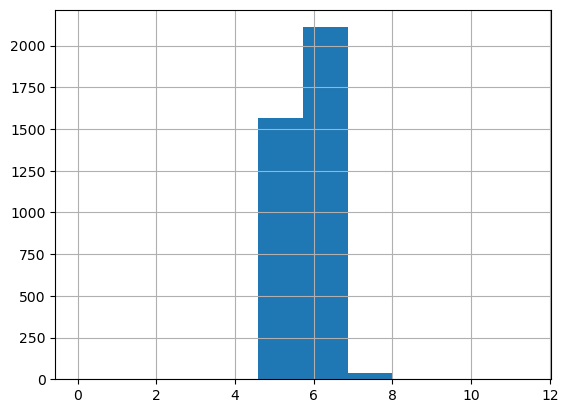

In [2565]:
df_encoded2["size_log"].hist()

In [2566]:
df_encoded2["size_log"].skew()

0.4396934788258915

In [2567]:
df_encoded2["property_age"].skew()

2.0115014093735497

In [2568]:
df_encoded2["property_age_log"] = np.log1p(df_encoded2["property_age"])

In [2569]:
df_encoded2["property_age_log"].skew()

0.42473059717728456

In [2570]:
df_encoded3 = df_encoded2.drop(columns=['size', 'property_age'],axis=1)
df_encoded3.columns

Index(['bedrooms', 'bathrooms', 'livingrooms', 'kitchen', 'garage',
       'driver_room', 'maid_room', 'furnished', 'ac', 'roof', 'pool',
       'frontyard', 'basement', 'duplex', 'stairs', 'elevator', 'fireplace',
       'price_log', '_ الدمام', '_ الرياض', '_ جدة', 'size_log',
       'property_age_log'],
      dtype='object')

In [2571]:
pd.set_option('display.max_columns', None)


In [2572]:
df_encoded3.head()

,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price_log,_ الدمام,_ الرياض,_ جدة,size_log,property_age_log
0,5,5,1,1,1,0,1,0,0,0,0,1,0,1,1,0,0,127.45918,0,1,0,5.52146,0.00000
1,4,5,2,1,1,0,0,0,0,0,0,1,0,0,1,0,0,121.04620,0,1,0,5.91350,0.00000
2,4,5,1,1,1,1,1,0,0,1,0,1,0,0,1,0,0,121.04620,0,1,0,5.94017,0.00000
3,5,5,3,0,1,1,1,0,0,0,0,1,0,0,0,0,0,119.13916,0,1,0,5.52146,0.00000
4,7,5,2,1,1,1,1,0,0,1,0,1,0,1,1,0,0,124.46193,0,1,0,5.99146,2.48491


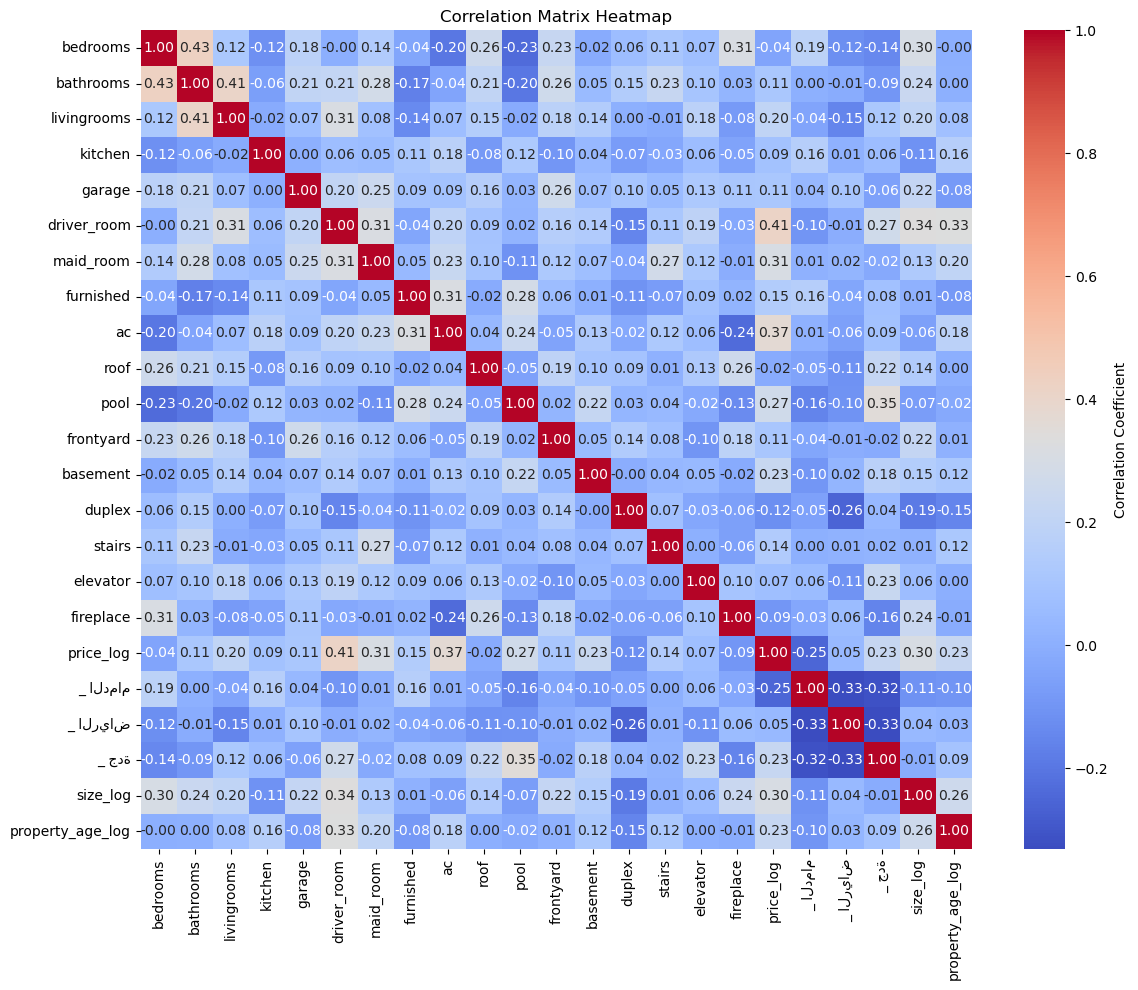

In [2573]:
corr = df_encoded3.corr()

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f",
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

In [2574]:
df_encoded3.shape

(3718, 23)

In [2575]:
df_encoded3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3718 entries, 0 to 3717
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bedrooms          3718 non-null   int64  
 1   bathrooms         3718 non-null   int64  
 2   livingrooms       3718 non-null   int64  
 3   kitchen           3718 non-null   int64  
 4   garage            3718 non-null   int64  
 5   driver_room       3718 non-null   int64  
 6   maid_room         3718 non-null   int64  
 7   furnished         3718 non-null   int64  
 8   ac                3718 non-null   int64  
 9   roof              3718 non-null   int64  
 10  pool              3718 non-null   int64  
 11  frontyard         3718 non-null   int64  
 12  basement          3718 non-null   int64  
 13  duplex            3718 non-null   int64  
 14  stairs            3718 non-null   int64  
 15  elevator          3718 non-null   int64  
 16  fireplace         3718 non-null   int64  


In [2576]:
df_encoded3.duplicated().sum()

2210

In [2577]:
df_encoded3.drop_duplicates(inplace=True)

In [2578]:
df_encoded3.shape

(1508, 23)

In [2579]:
X = df_encoded3.drop(columns="price_log",axis =1)
y = df_encoded3["price_log"]


In [2580]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2687]:
pipe = Pipeline([#("norm",Normalizer()),
                ("poly",PolynomialFeatures(degree = 2,include_bias=False)),
                 ("scale",StandardScaler()),
                 ("lr",LinearRegression())
                ])

In [2689]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scale', StandardScaler()), ('lr', LinearRegression())])

In [2691]:
y_pred = pipe.predict(X_test)

In [2699]:
r2 = r2_score(y_test,y_pred)
r2

0.3439428121019841

In [2701]:
scores = cross_val_score(pipe,X, y, cv=5, scoring ="r2")

In [2703]:
scores.mean()

-1.3555442257089582e+24

In [2705]:
print("Train R² score:", pipe.score(X_train, y_train))
print("Test  R² score:", pipe.score(X_test, y_test))

Train R² score: 0.5501645678298862
Test  R² score: 0.3439428121019841


In [2593]:
pipe3 = Pipeline([("poly",PolynomialFeatures(degree=2,include_bias=False)),
                  ("ss",StandardScaler()),
                  ("lasso",LassoCV(cv=10))
                ])


D:\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49.00772589132248, tolerance: 25.743217868923622
  model = cd_fast.enet_coordinate_descent_gram(
D:\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50.28602602853789, tolerance: 25.743217868923622
  model = cd_fast.enet_coordinate_descent_gram(
D:\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60.26211780610902, tolerance: 25.743217868923622
  model = cd_fast.enet_coordinate_descent_gram(
D:\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('ss', StandardScaler()), ('lasso', LassoCV(cv=10))])

In [2594]:
y_pred3 =pipe3.predict(X_test)


In [2595]:
print("Train R² score:", pipe3.score(X_train, y_train))
print("Test  R² score:", pipe3.score(X_test, y_test))

Train R² score: 0.4272025422617557
Test  R² score: 0.32146998234312063


In [2707]:
pipe4 = Pipeline([
    ("poly",PolynomialFeatures(degree = 2,include_bias=False)),
    ("ss",StandardScaler()),
    #("select", SelectFromModel(RidgeCV(alphas=np.logspace(-3,2,50)))),
    ("ridge", RidgeCV(alphas=np.logspace(-3, 2, 50), cv=10))
])

In [2709]:
pipe4.fit(X_train,y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('ss', StandardScaler()),
                ('ridge',
                 RidgeCV(alphas=array([1.00000000e-03, 1.26485522e-03, 1.59985872e-03, 2.02358965e-03,
       2.55954792e-03, 3.23745754e-03, 4.09491506e-03, 5.17947468e-03,
       6.55128557e-03, 8.28642773e-03, 1.04811313e-02, 1.32571137e-02,
       1.67683294e-02, 2.12095089e-02, 2.68269580e-02, 3.3932...
       2.81176870e-01, 3.55648031e-01, 4.49843267e-01, 5.68986603e-01,
       7.19685673e-01, 9.10298178e-01, 1.15139540e+00, 1.45634848e+00,
       1.84206997e+00, 2.32995181e+00, 2.94705170e+00, 3.72759372e+00,
       4.71486636e+00, 5.96362332e+00, 7.54312006e+00, 9.54095476e+00,
       1.20679264e+01, 1.52641797e+01, 1.93069773e+01, 2.44205309e+01,
       3.08884360e+01, 3.90693994e+01, 4.94171336e+01, 6.25055193e+01,
       7.90604321e+01, 1.00000000e+02]),
                         cv=10))])

In [2711]:
y4 =pipe4.predict(X_test)

In [2713]:
print("Train R² score:", pipe4.score(X_train, y_train))
print("Test  R² score:", pipe4.score(X_test, y_test))

Train R² score: 0.48976292580793956
Test  R² score: 0.35048479224950935


In [2715]:
scores4 = cross_val_score(pipe4,X, y, cv=5, scoring ="r2")


In [2716]:
scores4.mean()

0.3029427448089991

In [2719]:
pipe5 = Pipeline([
     ("poly",PolynomialFeatures(degree = 2,include_bias=False)),
    ("ss",StandardScaler()),
    ("select",SelectFromModel(LassoCV(cv=5), threshold="mean")),
    ("lr",LinearRegression())
])

In [2721]:
pipe5.fit(X_train,y_train)

D:\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.32105377262633, tolerance: 22.78940530706893
  model = cd_fast.enet_coordinate_descent_gram(
D:\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62.689143356867135, tolerance: 22.78940530706893
  model = cd_fast.enet_coordinate_descent_gram(
D:\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63.87871816380357, tolerance: 22.78940530706893
  model = cd_fast.enet_coordinate_descent_gram(
D:\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You m

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('ss', StandardScaler()),
                ('select',
                 SelectFromModel(estimator=LassoCV(cv=5), threshold='mean')),
                ('lr', LinearRegression())])

In [2722]:
print("Train R² score:", pipe5.score(X_train, y_train))
print("Test  R² score:", pipe5.score(X_test, y_test))

Train R² score: 0.43441170009547225
Test  R² score: 0.3047078207976355


In [2725]:
pipe6 = Pipeline([
    ("feature_select",
     SelectFromModel(LassoCV(cv=5), threshold="mean")),
    ("model", LinearRegression())
])

In [2727]:
pipe6.fit(X_train,y_train)

Pipeline(steps=[('feature_select',
                 SelectFromModel(estimator=LassoCV(cv=5), threshold='mean')),
                ('model', LinearRegression())])

In [2729]:
print("Train R² score:", pipe6.score(X_train, y_train))
print("Test  R² score:", pipe6.score(X_test, y_test))

Train R² score: 0.3087377134867758
Test  R² score: 0.23213670871695735


In [2735]:
pipe7= Pipeline([
    ("ss",StandardScaler()),
    #("poly",PolynomialFeatures(degree=1,interaction_only=True,include_bias=False)),
    ("model",RandomForestRegressor(n_estimators=300, max_depth=7, random_state=42))
])
pipe7.fit(X_train,y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('model',
                 RandomForestRegressor(max_depth=7, n_estimators=300,
                                       random_state=42))])

In [2736]:
print("Train R² score:", pipe7.score(X_train, y_train))
print("Test  R² score:", pipe7.score(X_test, y_test))

Train R² score: 0.6122596026535732
Test  R² score: 0.3169983279579319
